In [9]:
!conda install watermark -y --channel conda-forge

Solving environment: done

# All requested packages already installed.



In [10]:
%load_ext watermark
%watermark  -d -u -a 'Ishan Dahal' -v -p numpy,scipy,matplotlib,sklearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Ishan Dahal 
last updated: 2020-10-11 

CPython 3.8.3
IPython 7.18.1

numpy 1.19.2
scipy 1.5.2
matplotlib 3.3.2
sklearn 0.23.2


In [11]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
np.random.seed(10)

In [14]:
iris = datasets.load_iris()

In [15]:
label = {0: 'setosa',
         1: 'versicolor',
         2: 'virginica'}

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
## Creating the dataframe
X = pd.DataFrame(iris['data'], columns=iris.feature_names)
y = iris.target
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


''

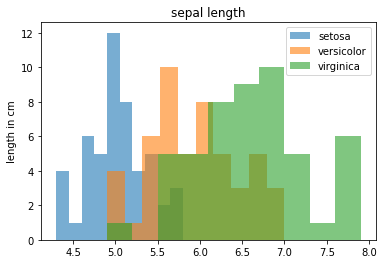

In [19]:
## Looking at the features 

fig, axes = plt.subplots()
bins = 10
axes.hist(X.iloc[:50, 0], bins, alpha=0.6, label='setosa')
axes.hist(X.iloc[50:100, 0], bins, alpha=0.6, label='versicolor')
axes.hist(X.iloc[100:150, 0], bins, alpha=0.6, label='virginica')
axes.set_ylabel('length in cm')
axes.set_title('sepal length')
plt.legend()
;

''

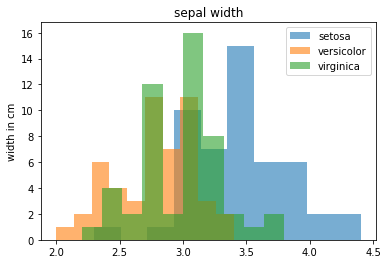

In [20]:
fig, axes = plt.subplots()
bins = 10
axes.hist(X.iloc[:50, 1], bins, alpha=0.6, label='setosa')
axes.hist(X.iloc[50:100, 1], bins, alpha=0.6, label='versicolor')
axes.hist(X.iloc[100:150, 1], bins, alpha=0.6, label='virginica')
axes.set_title('sepal width')
axes.set_ylabel('width in cm')
plt.legend()
;

''

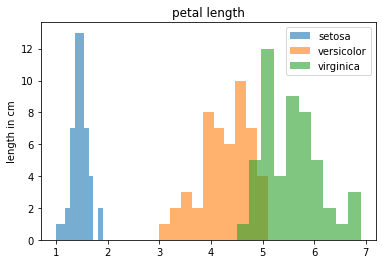

In [21]:
fig, axes = plt.subplots()
bins = 10
axes.hist(X.iloc[:50, 2], bins, alpha=0.6, label='setosa')
axes.hist(X.iloc[50:100, 2], bins, alpha=0.6, label='versicolor')
axes.hist(X.iloc[100:150, 2], bins, alpha=0.6, label='virginica')
axes.set_title('petal length')
axes.set_ylabel('length in cm')
plt.legend()
;

''

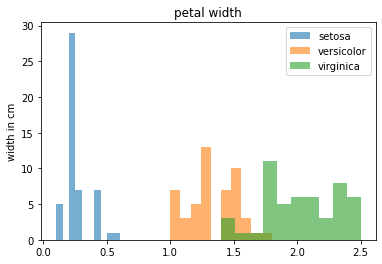

In [22]:
fig, axes = plt.subplots()
bins = 10
axes.hist(X.iloc[:50, 3], bins, alpha=0.6, label='setosa')
axes.hist(X.iloc[50:100, 3], bins, alpha=0.6, label='versicolor')
axes.hist(X.iloc[100:150, 3], bins, alpha=0.6, label='virginica')
axes.set_title('petal width')
axes.set_ylabel('width in cm')
plt.legend()
;

In [23]:
## targets corresponding to the features
y = pd.Series(y)

In [24]:
## Shuffling the dataset
arr = np.arange(y.shape[0])
shuffled_index = np.random.permutation(arr)
shuffled_index
shuffled_X = X.iloc[shuffled_index]
shuffled_y = y.iloc[shuffled_index]
shuffled_y.head()

87     1
111    2
10     0
91     1
49     0
dtype: int64

In [25]:
## Using sklearn to split the data
from sklearn.model_selection import train_test_split

X_hold, X_test, y_hold, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_hold, y_hold, test_size=0.2, stratify=y_hold)

In [26]:
## using kneighbors to separate the flowers
params = [1, 3, 5, 10, 20]
valid_percent_correct = []

for param in params: 
    knn_ = KNeighborsClassifier(n_neighbors=param)
    knn_.fit(X_train, y_train)
    valid_percent_correct.append(round((knn_.predict(X_valid) == y_valid).sum() / len(y_valid), 3))
print(f"Validation accuracy for {params} neighbors are {valid_percent_correct} respectively")

Validation accuracy for [1, 3, 5, 10, 20] neighbors are [0.952, 0.952, 0.952, 0.952, 0.952] respectively


In [27]:
## Looks like using 10 nearest neighbors produces the highest accuracy
knn_ = KNeighborsClassifier(n_neighbors=10)
knn_.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [28]:
print(f"Final accuracy on the test set: {((knn_.predict(X_test) == y_test).sum() / len(y_test) * 100):.2f}%")

Final accuracy on the test set: 97.78%
